In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
DATA_PATH = "../data"

In [68]:
date_cols = [
    "FIRST_COLLECTION_SCHEDULE_EARLIEST",
    "FIRST_COLLECTION_SCHEDULE_LATEST",
    "LAST_DELIVERY_SCHEDULE_EARLIEST",
    "LAST_DELIVERY_SCHEDULE_LATEST",
]

shipment_bookings = pd.read_csv(f"{DATA_PATH}/Shipment_bookings.csv", parse_dates=date_cols)
shipment_bookings.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00


In [69]:
shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].min()

Timestamp('2023-09-29 14:00:00+0000', tz='UTC')

In [70]:
shipment_bookings.columns

Index(['PROJECT_ID', 'SHIPMENT_NUMBER', 'CARRIER_DISPLAY_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST'],
      dtype='object')

In [71]:
shipment_bookings.shape

(3245, 15)

In [72]:
# Check for null values
shipment_bookings.isnull().sum()

PROJECT_ID                            0
SHIPMENT_NUMBER                       0
CARRIER_DISPLAY_ID                    0
VEHICLE_SIZE                          0
VEHICLE_BUILD_UP                      0
FIRST_COLLECTION_POST_CODE            1
LAST_DELIVERY_POST_CODE               4
FIRST_COLLECTION_LATITUDE             0
FIRST_COLLECTION_LONGITUDE            0
LAST_DELIVERY_LATITUDE                0
LAST_DELIVERY_LONGITUDE               0
FIRST_COLLECTION_SCHEDULE_EARLIEST    0
FIRST_COLLECTION_SCHEDULE_LATEST      0
LAST_DELIVERY_SCHEDULE_EARLIEST       0
LAST_DELIVERY_SCHEDULE_LATEST         0
dtype: int64

In [73]:
gps = pd.read_csv(f"{DATA_PATH}/GPS_data.csv", parse_dates=["RECORD_TIMESTAMP"])

In [74]:
gps.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
0,SEZHUK-230918-245388,53.291931,-1.072948,2023-10-09 19:25:00+01:00
1,SEZHUK-230918-245388,53.400404,-1.078563,2023-10-09 19:40:00+01:00
2,SEZHUK-230918-245388,53.574182,-1.215761,2023-10-09 19:55:00+01:00
3,SEZHUK-230918-245388,53.706805,-1.336503,2023-10-09 20:10:00+01:00
4,SEZHUK-230918-245388,53.747501,-1.640298,2023-10-09 20:25:00+01:00


Assuming that the delivery is considered "delivered" at the latest timestamp in the GPS data for its shipment number, we want to calculate whether the maximum `RECORD_TIMESTAMP` in the GPS data is greater than `LAST_DELIVERY_SCHEDULE_LATEST` for each shipment.

In [75]:
latest_gps = gps.sort_values(by="RECORD_TIMESTAMP", ascending=False).drop_duplicates(
    subset=["SHIPMENT_NUMBER"],
    keep="first",
)
latest_gps.head()

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP
390552,SEZHUK-231127-266808,52.129432,-1.002753,2023-12-30 23:59:00+00:00
632889,SEZHUK-231226-276773,55.074868,-3.305964,2023-12-30 23:59:00+00:00
587908,SEZHUK-231217-275034,53.763930,-1.740779,2023-12-30 23:52:00+00:00
390144,SEZHUK-231127-266800,53.763930,-1.740779,2023-12-30 23:52:00+00:00
603621,SEZHUK-231219-275529,53.477451,-1.472694,2023-12-30 23:45:00+00:00


In [76]:
# Filter data to shipments  between October 1st and December 31st, 2023

shipment_bookings = shipment_bookings[
    shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].between(
        "2023-10-01 00:00:00", "2024-12-31 23:59:59"
    )
]
shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"].min(), shipment_bookings[
    "FIRST_COLLECTION_SCHEDULE_EARLIEST"
].max()

(Timestamp('2023-10-01 00:30:00+0000', tz='UTC'),
 Timestamp('2023-12-31 00:30:00+0000', tz='UTC'))

In [77]:
shipment_bookings = shipment_bookings.merge(
    latest_gps[["SHIPMENT_NUMBER", "RECORD_TIMESTAMP"]].rename(
        {"RECORD_TIMESTAMP": "LATEST_GPS_TIMESTAMP"}, axis=1
    ),
    on="SHIPMENT_NUMBER",
    how="left",
)
shipment_bookings.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,LATEST_GPS_TIMESTAMP
0,5456fcfa-5b0c-428e-b322-240d508b6660,SEZHUK-231005-250448,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,PE29 2XR,EH48 2FB,52.315672,-0.157664,55.877803,-3.648558,2023-10-06 09:45:00+00:00,2023-10-06 10:00:00+00:00,2023-10-09 09:55:00+00:00,2023-10-09 10:25:00+00:00,2023-10-06 10:24:00+01:00
1,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231217-275004,CAUK000660,Tractor Unit,Box 44ft,BD5 8LZ,RG19 4BQ,53.764125,-1.740145,51.398851,-1.231993,2023-12-19 14:20:00+00:00,2023-12-19 16:00:00+00:00,2023-12-20 06:00:00+00:00,2023-12-20 08:56:00+00:00,2023-12-20 04:08:00+00:00
2,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231210-272018,CAUK000435,Tractor Unit,Box 44ft,BD5 8LZ,EN3 7QP,53.767302,-1.746560,51.660700,-0.022247,2023-12-14 01:20:00+00:00,2023-12-14 03:00:00+00:00,2023-12-14 07:03:00+00:00,2023-12-14 10:43:00+00:00,2023-12-14 10:18:00+00:00
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272127,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,HP22 5BL,NG31 7UH,51.779657,-0.772897,52.888113,-0.634948,2023-12-13 09:00:00+00:00,2023-12-13 09:30:00+00:00,2023-12-13 15:30:00+00:00,2023-12-13 16:00:00+00:00,2023-12-13 17:22:00+00:00
4,39a4e234-5d35-4d94-8e8a-b8bf6fe13953,SEZHUK-231025-256168,CAUK000155,Tractor Unit,Curtain Side,CV23 8BQ,G75 0ZZ,52.334853,-1.180450,55.735089,-4.168719,2023-11-07 14:00:00+00:00,2023-11-07 15:00:00+00:00,2023-11-07 23:00:00+00:00,2023-11-07 23:59:00+00:00,2023-11-08 03:53:00+00:00


### Percentage of shipments delayed

In [78]:
# Calculating the % of delayed shipments

shipment_bookings["DELAYED"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"] + pd.Timedelta("30 minutes")
    < shipment_bookings["LATEST_GPS_TIMESTAMP"]
)
delayed = round(shipment_bookings["DELAYED"].mean(), 2)
print(f"{delayed * 100}% of shipments are delayed.")

37.0% of shipments are delayed.


### Data Cleaning

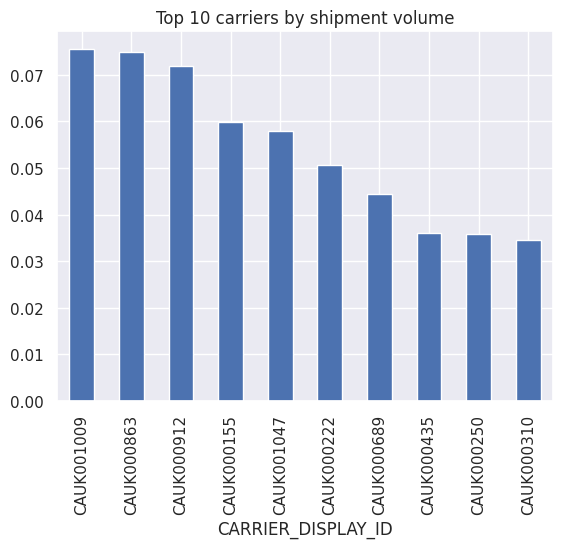

In [79]:
carrier_share = (
    shipment_bookings.groupby("CARRIER_DISPLAY_ID")["DELAYED"]
    .count()
    .sort_values(ascending=False)
    / shipment_bookings.shape[0]
)
carrier_share[:10].plot.bar(title="Top 10 carriers by shipment volume")
plt.show()

In [80]:
shipment_bookings["VEHICLE_SIZE"].unique()

array(['Tractor Unit', '3.5T Van', '3.5 T Van', '18T Rigid', '26T Rigid',
       '7.5T Rigid'], dtype=object)

In [81]:
# Clean up VEHICLE_SIZE column
shipment_bookings["VEHICLE_SIZE"] = shipment_bookings["VEHICLE_SIZE"].str.replace(" T", "T")

In [82]:
def plot_bars(attribute: str, data=shipment_bookings) -> None:
    sns.set_theme(style="darkgrid")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    grouped = data.groupby([attribute, 'DELAYED']).size().unstack()
    grouped.plot.bar(stacked=True, ax=axes[0], title=f"Delayed shipments by {attribute} (Counts)")
    axes[0].set_ylabel('Count')
    grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0) * 100
    grouped_normalized.plot.bar(stacked=True, ax=axes[1], title=f"Delayed shipments by {attribute} (%)")
    axes[1].set_ylabel('Percentage')
    plt.tight_layout()
    plt.show()


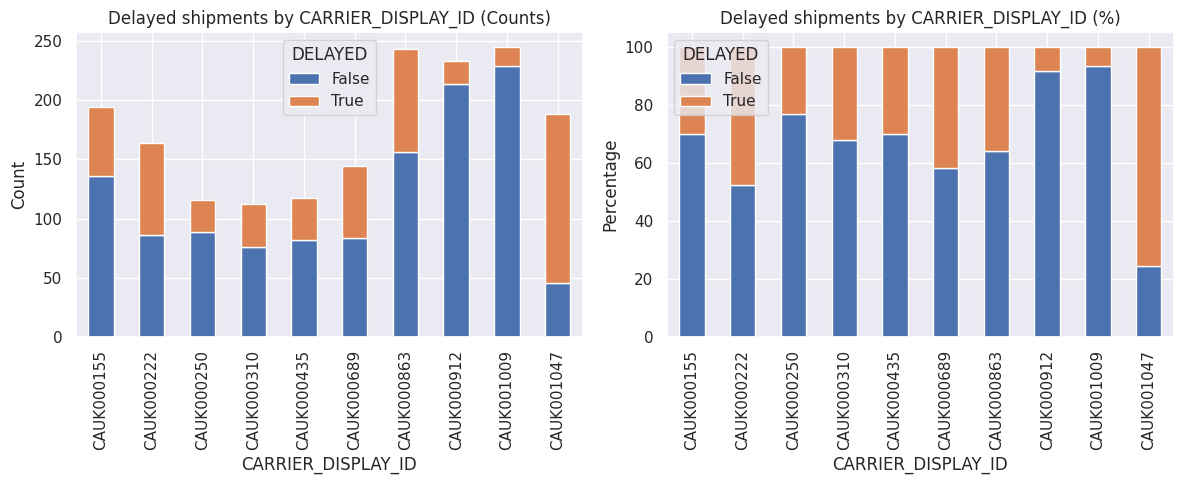

In [83]:
plot_bars("CARRIER_DISPLAY_ID", data=shipment_bookings[shipment_bookings["CARRIER_DISPLAY_ID"].isin(carrier_share[:10].index)])

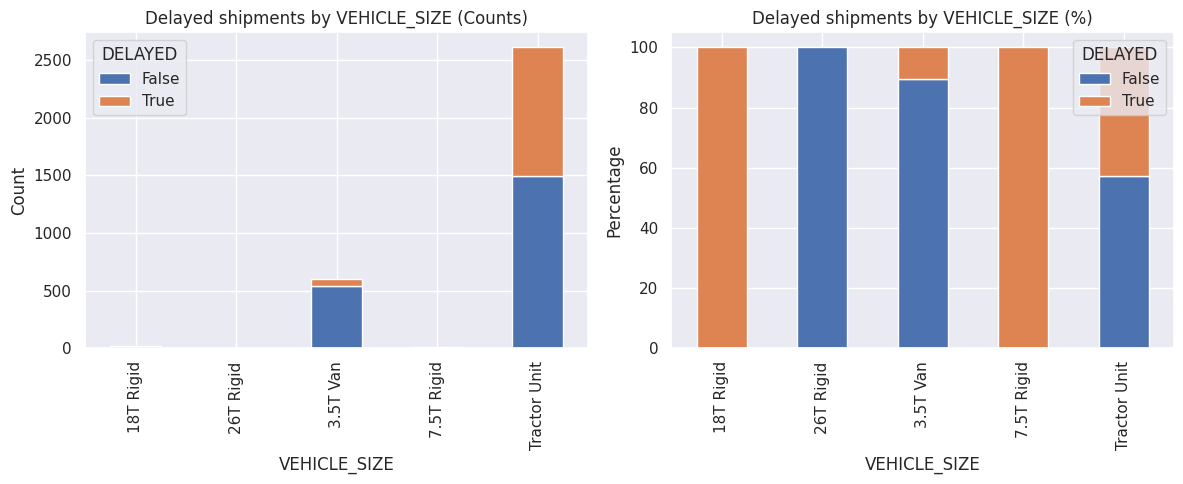

In [84]:
plot_bars("VEHICLE_SIZE")
plt.show()

In [86]:
shipment_bookings["VEHICLE_BUILD_UP"].unique()

array(['Curtain-Side 13.6M Trailer', 'Box 44ft', 'Curtain Side',
       'LWB Van', 'Box', 'Tractor Only', 'Tractor Only 6x2',
       'Temperature-Controlled', 'Double Deck Trailer', '40ft Container',
       'High Security', 'Box 40ft', '20ft Container'], dtype=object)

In [116]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Radius of Earth in kilometers. Use 3956 for miles
    R = 6371.0
    
    # Distance in kilometers
    distance = R * c
    
    return distance


In [ ]:

shipment_bookings["DISTANCE"] = shipment_bookings.apply(
    lambda x: haversine(x["FIRST_COLLECTION_LATITUDE"], x["FIRST_COLLECTION_LONGITUDE"], x["LAST_DELIVERY_LATITUDE"], x["LAST_DELIVERY_LONGITUDE"]),
    axis=1
)

In [ ]:
shipment_bookings = shipment_bookings[shipment_bookings['DISTANCE'] > 0]

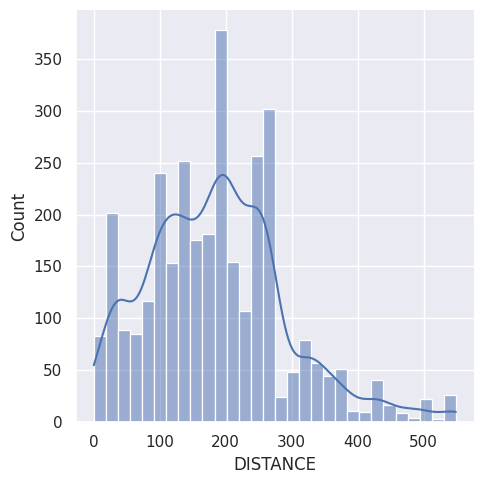

In [121]:
sns.displot(shipment_bookings, x="DISTANCE", kind="hist", kde=True, fill=True)

### Time feature engineering

Add features for duration and windows etc from collection/delivery datetimes.

Min booking hour: 0
Max booking hour: 23


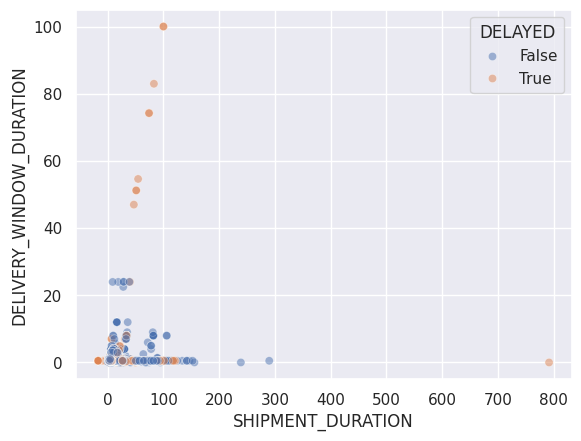

In [88]:
# Extracting day of the week from the earliest collection date
shipment_bookings["COLLECTION_DAY"] = shipment_bookings[
    "FIRST_COLLECTION_SCHEDULE_EARLIEST"
].dt.day_name()
# Extracting day of the week from the latest delivery date
shipment_bookings["DELIVERY_DAY"] = shipment_bookings[
    "LAST_DELIVERY_SCHEDULE_LATEST"
].dt.day_name()
# Extracting the hour of the day from the latest delivery date
shipment_bookings["DELIVERY_HOUR"] = shipment_bookings[
    "LAST_DELIVERY_SCHEDULE_LATEST"
].dt.hour

print(f"Min booking hour: {shipment_bookings["DELIVERY_HOUR"].min()}")
print(f"Max booking hour: {shipment_bookings["DELIVERY_HOUR"].max()}")
      # Durations
# Delivery window duration
shipment_bookings["DELIVERY_WINDOW_DURATION"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]
    - shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
).dt.total_seconds() / 3600

# Shipment duration
shipment_bookings["SHIPMENT_DURATION"] = (
    shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]
    - shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
).dt.total_seconds() / 3600

sns.scatterplot(
    data=shipment_bookings,
    x="SHIPMENT_DURATION",
    y="DELIVERY_WINDOW_DURATION",
    hue="DELAYED",
    alpha=0.5,
)
plt.show()

In [89]:
# Drop delivery windows over 24 hours
shipment_bookings = shipment_bookings[
    shipment_bookings["DELIVERY_WINDOW_DURATION"] <= 24
]
# Drop shipment durations over 180 days
shipment_bookings = shipment_bookings[shipment_bookings["SHIPMENT_DURATION"] <= 180]

# Inspect 0 and negative shipment durations
shipment_bookings.loc[
    shipment_bookings["SHIPMENT_DURATION"] <= 0,
    [
        "SHIPMENT_NUMBER",
        "FIRST_COLLECTION_SCHEDULE_EARLIEST",
        "LAST_DELIVERY_SCHEDULE_LATEST",
        "SHIPMENT_DURATION",
    ],
]

,SHIPMENT_NUMBER,FIRST_COLLECTION_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,SHIPMENT_DURATION
319,SEZHUK-231220-276089,2023-12-21 19:00:00+00:00,2023-12-21 10:45:00+00:00,-8.25
456,SEZHUK-231215-274563,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
537,SEZHUK-231215-274632,2023-12-17 20:00:00+00:00,2023-12-17 03:00:00+00:00,-17.00
802,SEZHUK-231215-274628,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
850,SEZHUK-231215-274570,2023-12-17 18:00:00+00:00,2023-12-17 01:00:00+00:00,-17.00
925,SEZHUK-231216-274798,2023-12-21 03:30:00+00:00,2023-12-20 23:00:00+00:00,-4.50
1090,SEZHUK-231215-274639,2023-12-16 10:00:00+00:00,2023-12-15 17:00:00+00:00,-17.00
1857,SEZHUK-231018-253947,2023-10-18 14:00:00+00:00,2023-10-18 11:00:00+00:00,-3.00
2461,SEZHUK-231205-269918,2023-12-06 06:00:00+00:00,2023-12-06 06:00:00+00:00,0.00
3061,SEZHUK-231212-272610,2023-12-13 18:30:00+00:00,2023-12-13 01:30:00+00:00,-17.00


It's possible that these times have been switched over, but unless we know for certain, and we have enough data to play with, it's probably better to remove these from our training data.

In [90]:
# Drop 0 and negative shipment durations
shipment_bookings.drop(
    index=shipment_bookings[shipment_bookings["SHIPMENT_DURATION"] <= 0].index,
    inplace=True,
)

In [91]:
# Inspect rows with EARLIEST columns > LATEST columns
shipment_bookings.loc[
    (shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
    > shipment_bookings["FIRST_COLLECTION_SCHEDULE_LATEST"]) |
    (shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
     > shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"]),
    [
        "SHIPMENT_NUMBER",
        "FIRST_COLLECTION_SCHEDULE_EARLIEST",
        "FIRST_COLLECTION_SCHEDULE_LATEST",
        "LAST_DELIVERY_SCHEDULE_EARLIEST",
        "LAST_DELIVERY_SCHEDULE_LATEST",
    ],
]


,SHIPMENT_NUMBER,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST
755,SEZHUK-231011-251901,2023-10-16 14:00:00+00:00,2023-10-16 12:56:00+00:00,2023-10-17 19:55:00+00:00,2023-10-17 20:25:00+00:00
874,SEZHUK-231026-256940,2023-10-27 14:00:00+00:00,2023-10-27 13:00:00+00:00,2023-10-28 00:01:00+00:00,2023-10-28 00:31:00+00:00


In [92]:
# Drop rows with EARLIEST columns > LATEST columns
shipment_bookings.drop(
    index=shipment_bookings[
        (shipment_bookings["FIRST_COLLECTION_SCHEDULE_EARLIEST"]
         > shipment_bookings["FIRST_COLLECTION_SCHEDULE_LATEST"]) |
        (shipment_bookings["LAST_DELIVERY_SCHEDULE_EARLIEST"]
         > shipment_bookings["LAST_DELIVERY_SCHEDULE_LATEST"])
    ].index,
    inplace=True,
)

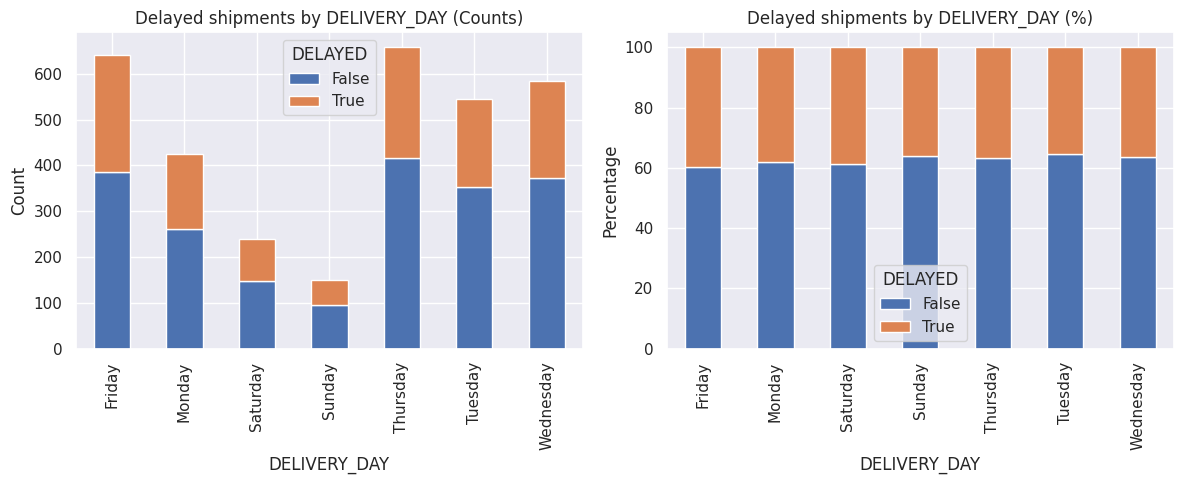

In [96]:
plot_bars("DELIVERY_DAY")
plt.show()

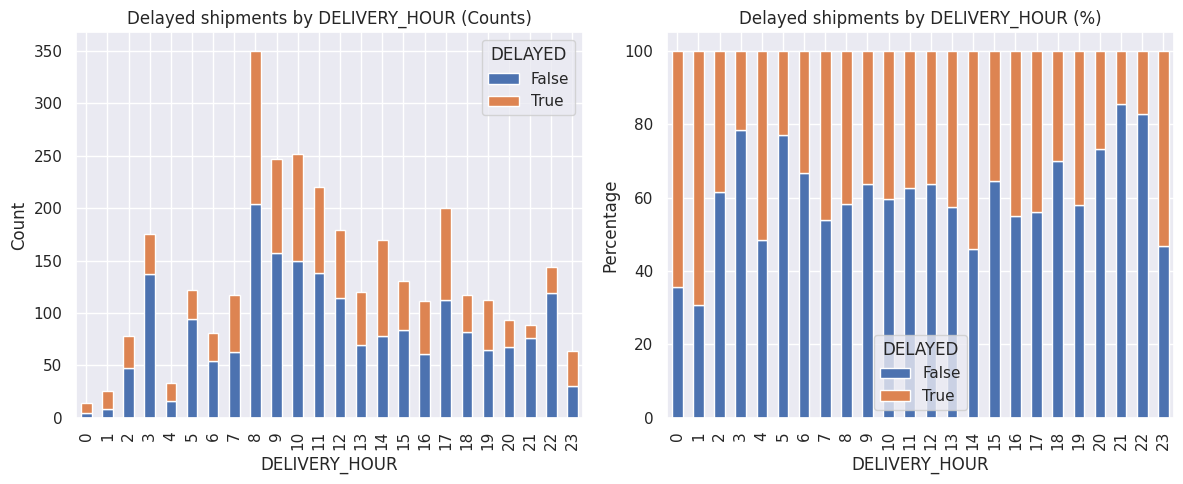

In [97]:
plot_bars("DELIVERY_HOUR")

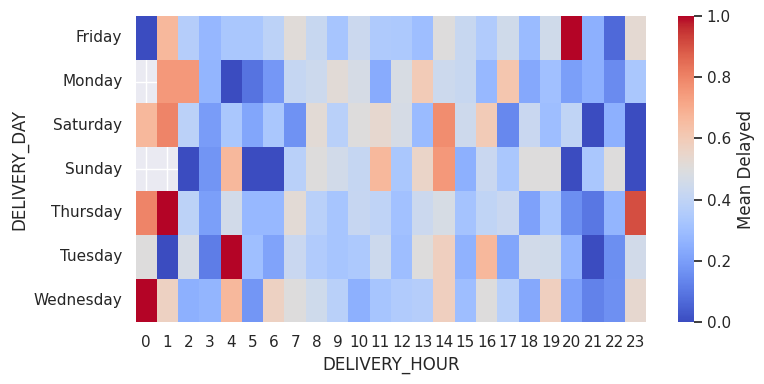

In [113]:
fix, ax = plt.subplots(figsize=(8, 4))
heatmap_data = shipment_bookings.groupby(['DELIVERY_DAY', 'DELIVERY_HOUR'])['DELAYED'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(columns=['DELIVERY_HOUR'], index=['DELIVERY_DAY'], values='DELAYED')
sns.heatmap(heatmap_pivot, cmap="coolwarm", annot=False, fmt=".1f", cbar_kws={'label': 'Mean Delayed'})
plt.tight_layout()

/tmp/ipykernel_204619/1340262594.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shipment_bookings.groupby([duration_bins, window_bins])["DELAYED"].mean().unstack(),


<Axes: xlabel='DELIVERY_WINDOW_DURATION', ylabel='SHIPMENT_DURATION'>

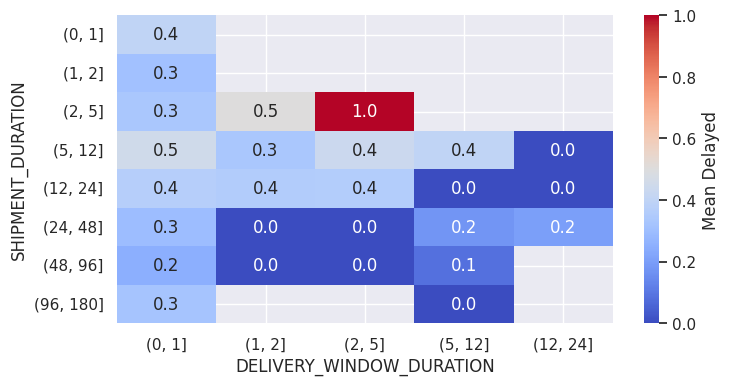

In [115]:
fix, ax = plt.subplots(figsize=(8, 4))
duration_bins = pd.cut(shipment_bookings["SHIPMENT_DURATION"], bins=[0, 1, 2, 5, 12, 24, 48, 96, 180])
window_bins = pd.cut(shipment_bookings["DELIVERY_WINDOW_DURATION"], bins=[0, 1, 2, 5, 12, 24])
sns.heatmap(
    shipment_bookings.groupby([duration_bins, window_bins])["DELAYED"].mean().unstack(),
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Mean Delayed"},
)